In [1]:
%run ./frocc.ipynb

In [18]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc

In [3]:
# https://osf.io/jda6s/
mnist = loadmat("datasets/mnist-original.mat")

In [4]:
digits = mnist['data'].T
labels = mnist['label'].flatten()

In [5]:
# only 0 is inlier
inlier = 0
labels = np.array(list(map(lambda x: 0 if x == inlier else 1, labels)))
index_inliers = np.argwhere(labels == 0).flatten()
index_outliers = np.argwhere(labels == 1).flatten()
data_inliers = digits[index_inliers]
labels_inliers = labels[index_inliers]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
  data_inliers, labels_inliers, test_size=0.3
)

In [7]:
outliers_to_sample = len(y_test)
sampled_outlier_indices = np.random.choice(index_outliers, size=outliers_to_sample)
x_test = np.concatenate((x_test, digits[sampled_outlier_indices]), axis=0)
y_test = np.concatenate((y_test, labels[sampled_outlier_indices]))

In [8]:
def run(m, eps, train, test, true, output=True):
  d = train.shape[1]

  detector = frocc(m, eps, d)
  detector.train(train)
  y_pred = detector.test(test)

  tp, fn, fp, tn = confusion_matrix(true, y_pred).ravel()
  tpr = tp/(tp + fn)
  fpr = fp/(fp + tn)
  acc = (tp + tn)/(tp + fn + fp + tn)

  if output:
    print("TP:  {} \t FN:  {}".format(tp, fn))
    print("FP:  {} \t TN:  {}".format(fp, tn))
    print("TPR: {:.3f} \t FPR: {:.3f}".format(tpr, fpr))
    print("ACC: {:.3f} \t LR+: {:.3f}".format(acc, tpr/fpr))
  
  del detector
  
  return tpr, fpr

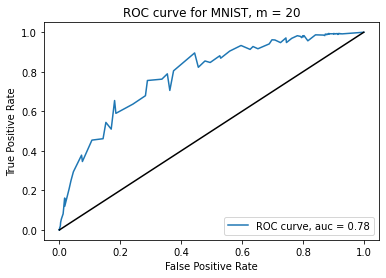

In [15]:
m = 20
n = 100
min_eps = 0.0001
max_eps = 1
fac = np.power(max_eps/min_eps, 1/(n-1))
epsilons = np.zeros((n,1)).flatten()
epsilons[0] = min_eps
for i in range(n-1):
  epsilons[i+1] = fac*epsilons[i]

lr_plus = np.zeros((n,2))

k = 5
results = np.zeros((k,2))
for i in range(n):
  eps = epsilons[i]
  for j in range(k):
    results[j] = run(m, eps, x_train, x_test, y_test, False)
  lr_plus[i] = results.mean(axis=0)

fpr = lr_plus.T[1]
tpr = lr_plus.T[0]
sort_by_fpr = np.argsort(fpr)
fpr = np.append(fpr[sort_by_fpr], [1.0])
tpr = np.append(tpr[sort_by_fpr], [1.0])
roc_auc = auc(fpr[fpr.nonzero()], tpr[fpr.nonzero()])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve, auc = %.2f' % roc_auc)
plt.plot([0,1],[0,1], color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for MNIST, m = %d' % m)
plt.legend(loc='lower right')
plt.savefig('results/mnist_roc_m%d' % m)

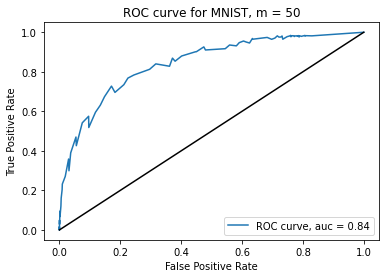

In [16]:
m = 50
n = 100
min_eps = 0.0001
max_eps = 1
fac = np.power(max_eps/min_eps, 1/(n-1))
epsilons = np.zeros((n,1)).flatten()
epsilons[0] = min_eps
for i in range(n-1):
  epsilons[i+1] = fac*epsilons[i]

lr_plus = np.zeros((n,2))

k = 5
results = np.zeros((k,2))
for i in range(n):
  eps = epsilons[i]
  for j in range(k):
    results[j] = run(m, eps, x_train, x_test, y_test, False)
  lr_plus[i] = results.mean(axis=0)

fpr = lr_plus.T[1]
tpr = lr_plus.T[0]
sort_by_fpr = np.argsort(fpr)
fpr = np.append(fpr[sort_by_fpr], [1.0])
tpr = np.append(tpr[sort_by_fpr], [1.0])
roc_auc = auc(fpr[fpr.nonzero()], tpr[fpr.nonzero()])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve, auc = %.2f' % roc_auc)
plt.plot([0,1],[0,1], color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for MNIST, m = %d' % m)
plt.legend(loc='lower right')
plt.savefig('results/mnist_roc_m%d' % m)

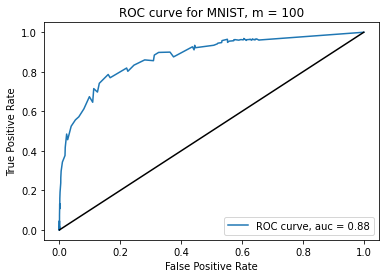

In [17]:
m = 100
n = 100
min_eps = 0.0001
max_eps = 1
fac = np.power(max_eps/min_eps, 1/(n-1))
epsilons = np.zeros((n,1)).flatten()
epsilons[0] = min_eps
for i in range(n-1):
  epsilons[i+1] = fac*epsilons[i]

lr_plus = np.zeros((n,2))

k = 5
results = np.zeros((k,2))
for i in range(n):
  eps = epsilons[i]
  for j in range(k):
    results[j] = run(m, eps, x_train, x_test, y_test, False)
  lr_plus[i] = results.mean(axis=0)

fpr = lr_plus.T[1]
tpr = lr_plus.T[0]
sort_by_fpr = np.argsort(fpr)
fpr = np.append(fpr[sort_by_fpr], [1.0])
tpr = np.append(tpr[sort_by_fpr], [1.0])
roc_auc = auc(fpr[fpr.nonzero()], tpr[fpr.nonzero()])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve, auc = %.2f' % roc_auc)
plt.plot([0,1],[0,1], color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for MNIST, m = %d' % m)
plt.legend(loc='lower right')
plt.savefig('results/mnist_roc_m%d' % m)